<a href="https://colab.research.google.com/github/raj-jaiswal/Exceptional/blob/main/Week_7_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week-7

Decision trees and KNN

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['font.size'] = 15

## Decision Trees

**Decision stumps**

A decision stump is a decision tree that has a single question at the root node which splits into two leaf nodes. A decision stump partitions the dataset based on a single question: $f_k < \theta$. This is therefore the simplest decision tree that we can come up with.

---
Use the following decision stump for problems 1 and 3: The root has $1000$ data-points out of which $200$ belong to class-1. The left child-node has $100$ data-points out of which $50$ belong to class-1.

### Problem-1

Write a function `entropy` that accepts the proportion of points that belong to class-1 in a node as argument and returns the entropy. Use $\log_2$ for all computations.

Use this function to compute the entropy of the parent node.

In [2]:
### Solution ###
def entropy(p):
  return -(p * np.log2(p) + (1 - p) * np.log2(1 - p))

entropy( 200/1000 )

0.7219280948873623

### Problem-2

Plot the entropy of a node as a function of $p$, the proportion of data-points that belong to class $+1$.

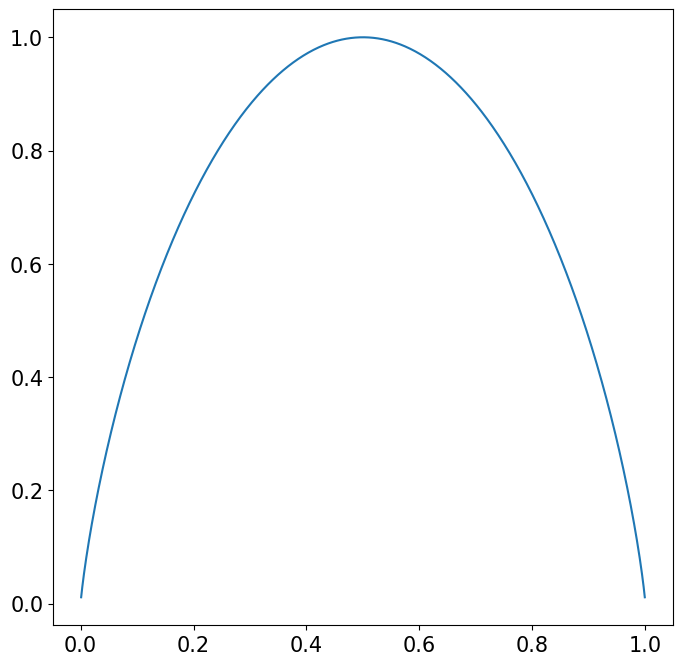

In [3]:
### Solution ###
X = np.linspace(0, 1, 1000)
Y = entropy(X)
plt.plot(X, Y)

### Problem-3

Write a function `IG` that accepts the following arguments:

- `E`: entropy of the parent node `Q`
- `El`: entropy of the left child `L`
- `Er`: entropy of the right child `R`
- `gamma`: proportion of data-points in left child

Use this function to compute the information gain for the parent node.

In [4]:
### Solution ###
def IG(E, El, Er, gamma):
  return E - gamma * El - (1 - gamma) * Er

IG( entropy(200/1000), entropy(50/100), entropy(150/900), 100/1000 )

0.03690791540384364

### Problem-4

Consider a decision stump with $1000$ data-points. Call the root node $Q$ and the left and right leaf nodes $L$ and $R$.

- The proportion of data-points that belong to class $+1$ in $Q$ is equal to $0.4$
- The proportion of points in the left node is equal to $0.7$, that is, $\gamma = 0.7$
-  $q$ is the proportion of data-points that belong to class $+1$ in $L$

What are the minimum ($q_{\min}$) and maximum ($q_{\max}$) values of $q$?

In [6]:
### Solution ###
n = 1000
n_positive = 0.4 * n
n_left = 0.7 * n
q_min = (n_positive - (n-n_left)) / n_left
q_max = n_positive / n_left
q_min, q_max

(0.14285714285714285, 0.5714285714285714)

### Problem-5

Using the above information, plot the information gain of the root as a function of $q$, where $q \in [q_{\min}, q_{\max}]$. Record at least two interesting observations.

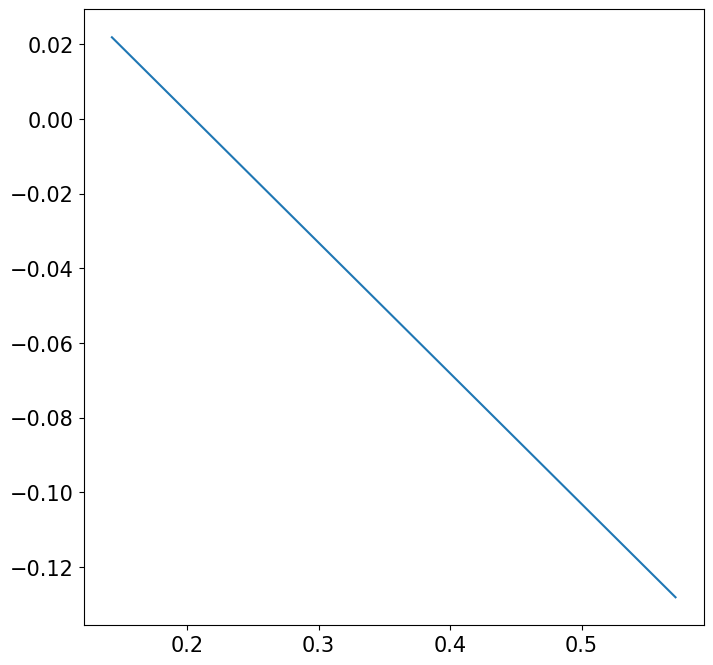

In [7]:
### Solution ###
q = np.linspace(q_min, q_max, 100)
ig = IG( entropy(200/1000), entropy(50/100), entropy(150/900), q )
plt.plot(q, ig)

### Problem-6

We will work with the dataset `X` for the next five problems. Visualize the data using a scatter plot. Color the points that belong to class $+1$ using "green" and those that belong to class $0$ using "red".

In [8]:
### Data ###
### DO NOT CHANGE THE CONTENTS OF THIS CELL ###
rng = np.random.default_rng(seed = 1001)
n_per = 50
cov = np.eye(2) / 10
X1 = rng.multivariate_normal([1, 1], cov, n_per)
y1 = np.ones(n_per)
X2 = rng.multivariate_normal([5, 3], cov , n_per)
y2 = np.zeros(n_per)
X3 = rng.multivariate_normal([3, 4], cov, n_per)
y3 = np.ones(n_per)
X4 = rng.multivariate_normal([3, 2], cov, n_per)
y4 = np.zeros(n_per)
X = np.concatenate((X1, X2, X3, X4), axis = 0)
y = np.int64(np.concatenate((y1, y2, y3, y4)))
### DO NOT CHANGE THE CONTENTS OF THIS CELL ###

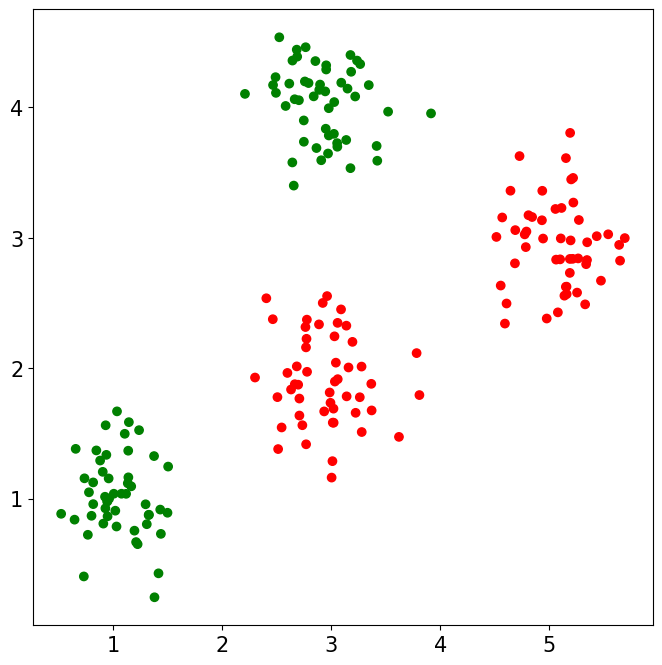

In [9]:
### Solution ###
colors = []
for i in y:
  if i == 1:
    colors.append('green')
  else:
    colors.append('red')
plt.scatter(X[:, 0], X[:, 1], c = colors)

### Problem-7

If you were to use a decision stump as a classifier:

- What is the best question $f_k < \theta$?
    - enter the feature index, $k$ (use zero-indexing)
    - enter the value of $\theta$
- What is the information gain for this question?

---

Write the function named `best_split` to solve this problem:

The function should accept the feature matrix `X` and the label vector `y` as arguements. It should return the tuple `(feat_best, value_best, ig_best)`.

In [29]:
### Solution ###
def best_theta(X, y, k):
  n=len(y)
  ig_max = 0
  value_best = 0
  min = X[:, k].min()
  max = X[:, k].max()
  for theta in np.linspace(min, max, 100):
    left = y[X[:, k] < theta]
    right = y[X[:, k] >= theta]

    ig = IG( entropy(y.sum()/n),
             entropy(left.sum()/len(left)),
             entropy(right.sum()/len(right)),
             (X[:, k] < theta).sum() / n )
    if ig > ig_max:
      ig_max = ig
      value_best = theta
  return (value_best, ig_max)

def best_split(X, y):
  best_ig = 0
  best_feat = 0
  best_value = 0
  for k in range(X.shape[1]):
    value, ig = best_theta(X, y, k)
    if ig > best_ig:
      best_ig = ig
      best_feat = k
      best_value = value
  return (best_feat, best_value, best_ig)

best_split(X, y)

(0, 3.5516769903337178, 0.3023672739763504)

### Problem-8

Grow a decision tree for this problem. You may have to use two programming concepts:

- recursion
- binary trees

Once you have grown the tree, answer the following questions:

- How many internal nodes does your tree have?
- How many leaf nodes does it have?

In [ ]:
### Solution ###
def predict(x1, x2):
  if

### Problem-9

Predict the label of the point $(3, 4)$.

In [ ]:
### Solution ###

### Problem-10

Plot the decision boundary.

In [ ]:
### Solution ###

## KNN


In [ ]:
### Data ###
### DO NOT EDIT THIS CELL ###
rng = np.random.default_rng(seed = 1001)
X = rng.uniform(-10, 10, (100, 2))
y = np.int32(np.zeros(X.shape[0]))
y[X[:, 1] > X[:, 0]] = 1
X = np.concatenate((X,
                   rng.multivariate_normal([-5, 5], np.eye(2), 10)),
                   axis = 0)
y = np.concatenate((y, np.int32(np.zeros(10))))
### DO NOT EDIT THIS CELL ###

### Problem-11

Visualize the data using a scatter plot. Use red for class $0$ and green for class $1$.

In [ ]:
### Solution ###

### Problem-12

Write a function `predict` that accepts the following arguments:

- `X` - feature matrix
- `y` - label vector
- `x_test` - test data-point
- `k` - number of neighbors

The function should return the prediction for the point `x_test`. Use this function to compute the predicted label for the point $(-3, -2)$ with $k = 10$.

In [ ]:
### Solution ###

### Problem-13

Plot the decision boundary for different values of $k$:

- $k = 1$
- $k = 3$
- $k = 7$
- $k = 15$
- $k = 31$
- $k = 63$

Record at least two observations.

In [ ]:
### Solution ###